In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install swifter

     |████████████████████████████████| 633 kB 15.2 MB/s 
     |████████████████████████████████| 280 kB 85.0 MB/s 
     |████████████████████████████████| 134 kB 88.3 MB/s 
  Created wheel for swifter: filename=swifter-1.1.2-py3-none-any.whl size=13210 sha256=bdc71dd57693aa7b7635b08f5492e75dd68c653c8b8dbc56c9ca1f45c4a9612f
  Stored in directory: /root/.cache/pip/wheels/79/7d/d1/9c1daa3e18ead25b4b641491851977b382f4b392a9a32ffc38
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle
import re,nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import swifter

from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
# to handle data imbalance
from imblearn.over_sampling import SMOTE

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [6]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics.pairwise import pairwise_distances

In [7]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

In [8]:
import pickle

In [9]:
reviews_ratings_df = pd.read_csv('/content/gdrive/MyDrive/CapstoneProject_e-commerce/sample30.csv' , encoding='latin-1')
reviews_ratings_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


# 1.	Data sourcing and sentiment analysis

### <br> 1.1 Exploratory data analysis, Data cleaning and text preprocessing
### <br> 1.2 Feature extraction
### <br> 1.3 Training a text classification model
1. Logistic regression
2. Random forest
3. XGBoost
4. Naive Bayes


## 1.1 Exploratory data analysis, Data cleaning and text preprocessing

In [10]:
reviews_ratings_df.shape

(30000, 15)

In [11]:
reviews_ratings_df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [12]:
reviews_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [13]:
reviews_ratings_df.isna().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [14]:
clean_rr_df= pd.DataFrame()

### Examing the id field

In [15]:
len(reviews_ratings_df.id.unique())

271

In [16]:
reviews_ratings_df.id.value_counts()

AVpf3VOfilAPnD_xjpun    8545
AVpfPaoqLJeJML435Xk9    3325
AVpfJP1C1cnluZ0-e3Xy    2039
AVpfW8y_LJeJML437ySW    1186
AVpfRTh1ilAPnD_xYic2    1143
                        ... 
AVpfP-rELJeJML435jEN       1
AVpfbpzd1cnluZ0-kqJV       1
AVpfbjraLJeJML439F91       1
AVpfa1joLJeJML4385hb       1
AV13O1A8GV-KLJ3akUyj       1
Name: id, Length: 271, dtype: int64

In [17]:
reviews_ratings_df[reviews_ratings_df['id']=="AVpf3VOfilAPnD_xjpun"]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
6479,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-26T13:31:39.000Z,NaN,True,1,"This is an outstanding product, it not only cl...",Fresh Smell,NaN,NaN,barsea,Positive
6480,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-08-15T15:47:17.000Z,NaN,NaN,1,I have been an avid user of Clorox Wipes for m...,Smell,NaN,NaN,sofia50,Positive
6481,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-29T07:41:03.000Z,NaN,NaN,1,I have used Clorox Wipes for years... Cannot l...,Who Changed The Scent??,Forney,NaN,renee65,Positive
6482,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-26T00:03:29.000Z,NaN,NaN,1,I use Clorox wipes fanatically all over my hom...,New Product Stinks,NaN,NaN,angi677,Positive
6483,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-01T00:00:00.000Z,False,True,1,"Being a mom of three, disinfecting the home ha...",Germ free,NaN,NaN,brandy33,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15019,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-18T00:00:00.000Z,False,True,5,Thia is a amazing product that fight germs and...,i love this product,NaN,NaN,jcyrachel69,Positive
15020,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-08T00:00:00.000Z,False,True,5,I love clorox wipes. They are very convenient ...,Clorox Wipes,NaN,NaN,tiffmillion,Positive
15021,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-08T00:00:00.000Z,False,True,5,"Easy to clean with just a wipe, The wipes are ...",Love the Wipes,NaN,NaN,karingbear,Positive
15022,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-08T00:00:00.000Z,False,True,5,"I love their wipes they are easy to use, quick...",Love,NaN,NaN,rocky200718,Positive


In [18]:
reviews_ratings_df.name.value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         8545
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   3325
Clorox Disinfecting Bathroom Cleaner                                              2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)               1143
                                                                                  ... 
5302050 15/16 FCT/HOSE ADAPTOR                                                       1
Clorox Ultimate Care Premium Bleach                                                  1
Pocket Watch Wall Clock Distressed Black - Yosemite Home Decor174                    1
Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct                                       1
Pink Friday: Roman Reloaded Re-Up (w/dvd)                                            1
Name: name, Length: 271, dtype: int64

After examing the id field, I found that id is the product(column name is 'name') unique identification. We can infer that by looking at the value_counts of both 'id' and 'name' columns are same

In [19]:
clean_rr_df["id"]=reviews_ratings_df.id

### Examing the name

In [20]:
reviews_ratings_df.name.value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         8545
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   3325
Clorox Disinfecting Bathroom Cleaner                                              2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)               1143
                                                                                  ... 
5302050 15/16 FCT/HOSE ADAPTOR                                                       1
Clorox Ultimate Care Premium Bleach                                                  1
Pocket Watch Wall Clock Distressed Black - Yosemite Home Decor174                    1
Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct                                       1
Pink Friday: Roman Reloaded Re-Up (w/dvd)                                            1
Name: name, Length: 271, dtype: int64

In [21]:
clean_rr_df["name"]=reviews_ratings_df.name

In [22]:
clean_rr_df

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
...,...,...
29995,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...
29996,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...
29997,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...
29998,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...


### Examing the reviews_rating  

In [23]:
reviews_ratings_df.reviews_rating.value_counts()

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

There are five review catagories are there and there are no null values

In [24]:
clean_rr_df['reviews_rating']=reviews_ratings_df.reviews_rating

### Examing the reviews_text

In [25]:
reviews_ratings_df.reviews_text.isna().sum()

0

In [26]:
clean_rr_df["reviews_text"]=reviews_ratings_df.reviews_text

### Examing the reviews_title

In [27]:
reviews_ratings_df.reviews_title.value_counts()

Great Product                       384
Great movie                         361
Clorox Wipes                        278
Great                               221
Great product                       205
                                   ... 
Keeping them healthy!                 1
Fighting Power                        1
great all together                    1
Great Product and Easy to Use...      1
Conditioned into healthy              1
Name: reviews_title, Length: 18535, dtype: int64

In [28]:
reviews_ratings_df.reviews_title.isna().sum()

190

In [29]:
clean_rr_df["reviews_title"]=reviews_ratings_df.reviews_title

In [30]:
clean_rr_df

,id,name,reviews_rating,reviews_text,reviews_title
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Just Awesome
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Good
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Good
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Disappointed
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Irritation
...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,I got this conditioner with Influenster to try...,Softness!!
29996,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,"I love it , I received this for review purpose...",I love it
29997,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,First of all I love the smell of this product....,Hair is so smooth after use
29998,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,I received this through Influenster and will n...,Perfect for my oily hair!


Since reviews_text and reviews_title signifies reviews of the corresponding user I megerge the both to get better results.

In [31]:
clean_rr_df["reviews"]=clean_rr_df[["reviews_text","reviews_title"]].apply(lambda x:str(x["reviews_text"])+" "+(str(x["reviews_title"])),axis=1)

In [32]:
clean_rr_df.reviews[0]

"i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy. Just Awesome"

In [33]:
clean_rr_df[["reviews_text","reviews_title","reviews"]]

,reviews_text,reviews_title,reviews
0,i love this album. it's very good. more to the...,Just Awesome,i love this album. it's very good. more to the...
1,Good flavor. This review was collected as part...,Good,Good flavor. This review was collected as part...
2,Good flavor.,Good,Good flavor. Good
3,I read through the reviews on here before look...,Disappointed,I read through the reviews on here before look...
4,My husband bought this gel for us. The gel cau...,Irritation,My husband bought this gel for us. The gel cau...
...,...,...,...
29995,I got this conditioner with Influenster to try...,Softness!!,I got this conditioner with Influenster to try...
29996,"I love it , I received this for review purpose...",I love it,"I love it , I received this for review purpose..."
29997,First of all I love the smell of this product....,Hair is so smooth after use,First of all I love the smell of this product....
29998,I received this through Influenster and will n...,Perfect for my oily hair!,I received this through Influenster and will n...


### Examing the reviews_username

In [34]:
clean_rr_df["reviews_username"]=reviews_ratings_df.reviews_username

In [35]:
num_nuls_username=clean_rr_df.reviews_username.isna().sum()
num_nuls_username

63

In [36]:
(num_nuls_username/len(clean_rr_df))*100

0.21

Since there are 0.21 null are there in the user name we have to remove the whole records for the null values

### Examing the user_sentiment

In [37]:
clean_rr_df["user_sentiment"]=reviews_ratings_df.user_sentiment

In [38]:
# distributionbased on (user_sentiment)
usersents=clean_rr_df['user_sentiment'].value_counts()
usersents

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

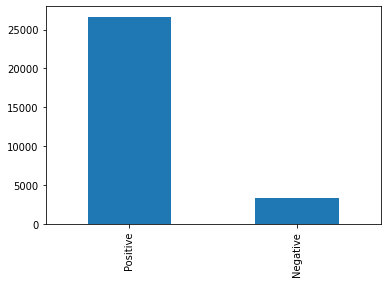

In [39]:
#plot
usersents.plot(kind='bar')

In [40]:
clean_rr_df["user_sentiment"].isna().sum()

1

Since user_sentiment has only one null value we can delete the whole coresponding record.

#### Deleting unwanted rows and columns

In [41]:
clean_rr_df=clean_rr_df[~clean_rr_df['reviews_username'].isna()]

In [42]:
clean_rr_df=clean_rr_df[~clean_rr_df["user_sentiment"].isna()]

In [43]:
clean_rr_df.shape

(29936, 8)

We have totally removed 64 records (63 from reviews_username and 1 from user_sentiment)

In [44]:
clean_rr_df.isna().sum()

id                    0
name                  0
reviews_rating        0
reviews_text          0
reviews_title       189
reviews               0
reviews_username      0
user_sentiment        0
dtype: int64

since reviews is the combination of the reviews_text and reviews_title, we can drop the both columns leaving reviews.

In [45]:
clean_rr_df.drop(['reviews_title'],axis=1,inplace=True)

In [46]:
clean_rr_df.isna().sum()

id                  0
name                0
reviews_rating      0
reviews_text        0
reviews             0
reviews_username    0
user_sentiment      0
dtype: int64

### Preprocessing

### Preparing the text

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Replaycing digits with their corresponding string words : {'0':'zero','1':'one','2':'two','3':'three','4':'four','5':'five','6':'six','7':'seven','8':'eight','9':'nine'} 


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


In [47]:
clean_rr_df.reviews

0        i love this album. it's very good. more to the...
1        Good flavor. This review was collected as part...
2                                        Good flavor. Good
3        I read through the reviews on here before look...
4        My husband bought this gel for us. The gel cau...
                               ...                        
29995    I got this conditioner with Influenster to try...
29996    I love it , I received this for review purpose...
29997    First of all I love the smell of this product....
29998    I received this through Influenster and will n...
29999    I received this product complimentary from inf...
Name: reviews, Length: 29936, dtype: object

In [48]:
sp_chars=set()
clean_rr_df.reviews.apply(lambda x:sp_chars.update(set(re.findall("[^A-Za-z]",x))))
sp_chars

{' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

The above set of charectors that are there in the data set need to be cleaned

In [49]:
# Funtion to clean the text

def clean_text(text):
  # lowercase the text
  text=text.lower()
  # remove square brackets
  text=re.sub(r'\[.*?\]',"",text)
  # remove punctuations
  text=re.sub(r'[%s]'% re.escape(string.punctuation),"",text)
  # replacing digits by it's corresponding english word
  text=digit_replace(text)
  return text

In [50]:
# Funtion to replace digits with their corresponding string words
def digit_replace(text):
  num_dict={'0':'zero','1':'one','2':'two','3':'three','4':'four','5':'five','6':'six','7':'seven','8':'eight','9':'nine'}
  new_text=''
  for ch in text:
    if ch.isdigit()==True:
      new_text=new_text+num_dict[ch]
    else:
      new_text=new_text+ch
 
  return new_text


In [51]:
clean_rr_df["clean_reviews"]= clean_rr_df.reviews.apply(lambda x:clean_text(x))
clean_rr_df["clean_reviews"]

0        i love this album its very good more to the hi...
1        good flavor this review was collected as part ...
2                                         good flavor good
3        i read through the reviews on here before look...
4        my husband bought this gel for us the gel caus...
                               ...                        
29995    i got this conditioner with influenster to try...
29996    i love it  i received this for review purposes...
29997    first of all i love the smell of this product ...
29998    i received this through influenster and will n...
29999    i received this product complimentary from inf...
Name: clean_reviews, Length: 29936, dtype: object

In [52]:
sp_chars=set()
clean_rr_df.clean_reviews.apply(lambda x:sp_chars.update(set(re.findall("[^A-Za-z]",x))))
sp_chars

{' '}

We have cleaned the data

### Lemmatization and use of POS tags to get relevant words from the texts(Includes removing of stop words)

In [53]:
# Funtion for Lematize the text
def lemma_text(text):
  doc=nlp(text)
  lemma_sent=[]
  for word in doc:
    lemma_sent.append(word.lemma_)
  return " ".join(lemma_sent)

In [54]:
clean_rr_df["lematized_text"]=clean_rr_df.clean_reviews.swifter.apply(lambda x:lemma_text(x))

Pandas Apply:   0%|          | 0/29936 [00:00<?, ?it/s]

In [55]:
# Function to get noun pos tags
def get_noun_pos(text):
  noun_pos=pos_tag(word_tokenize(text))
  return " ".join([word for word,tag in noun_pos if tag=='NN'])

In [56]:
clean_rr_df["noun_pos_text"]=clean_rr_df.lematized_text.swifter.apply(lambda x:get_noun_pos(x))

Pandas Apply:   0%|          | 0/29936 [00:00<?, ?it/s]

In [57]:
clean_rr_df

,id,name,reviews_rating,reviews_text,reviews,reviews_username,user_sentiment,clean_reviews,lematized_text,noun_pos_text
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,i love this album. it's very good. more to the...,joshua,Positive,i love this album its very good more to the hi...,i love this album -PRON- very good more to the...,album hip hop side pop sound i everyday gym i ...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Good flavor. This review was collected as part...,dorothy w,Positive,good flavor this review was collected as part ...,good flavor this review be collect as part of ...,flavor review part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Good flavor. Good,dorothy w,Positive,good flavor good,good flavor good,flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,I read through the reviews on here before look...,rebecca,Negative,i read through the reviews on here before look...,i read through the review on here before look ...,i review look couple lubricant review i starte...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,My husband bought this gel for us. The gel cau...,walker557,Negative,my husband bought this gel for us the gel caus...,-PRON- husband buy this gel for -PRON- the gel...,-PRON- husband gel gel cause irritation feel -...
...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,I got this conditioner with Influenster to try...,I got this conditioner with Influenster to try...,laurasnchz,Positive,i got this conditioner with influenster to try...,i get this conditioner with influenster to try...,i conditioner influenster use end hair mess re...
29996,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,"I love it , I received this for review purpose...","I love it , I received this for review purpose...",scarlepadilla,Positive,i love it i received this for review purposes...,i love -PRON- i receive this for review purp...,i -PRON- i review purpose influenster hair fee...
29997,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,First of all I love the smell of this product....,First of all I love the smell of this product....,liviasuexo,Positive,first of all i love the smell of this product ...,first of all i love the smell of this product ...,smell product wash hair i product influenster ...
29998,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,I received this through Influenster and will n...,I received this through Influenster and will n...,ktreed95,Positive,i received this through influenster and will n...,i receive this through influenster and will ne...,influenster anything conditioner hair do hair ...


In [58]:
# Function to get essential pos tags
def get_pos(text):
  noun_pos=pos_tag(word_tokenize(text))
  return " ".join([word for word,tag in noun_pos if tag in ['JJ', 'NN','VB','RB','VBP','RP']])

In [59]:
clean_rr_df["pos_text"]=clean_rr_df.lematized_text.swifter.apply(lambda x:get_pos(x))

Pandas Apply:   0%|          | 0/29936 [00:00<?, ?it/s]

In [60]:
clean_rr_df[["clean_reviews",	"lematized_text",	"noun_pos_text","pos_text"]]

,clean_reviews,lematized_text,noun_pos_text,pos_text
0,i love this album its very good more to the hi...,i love this album -PRON- very good more to the...,album hip hop side pop sound i everyday gym i ...,i love album -PRON- very good hip hop side cur...
1,good flavor this review was collected as part ...,good flavor this review be collect as part of ...,flavor review part promotion,good flavor review be collect part promotion good
2,good flavor good,good flavor good,flavor,good flavor good
3,i read through the reviews on here before look...,i read through the review on here before look ...,i review look couple lubricant review i starte...,i read review here look buy couple lubricant b...
4,my husband bought this gel for us the gel caus...,-PRON- husband buy this gel for -PRON- the gel...,-PRON- husband gel gel cause irritation feel -...,-PRON- husband buy gel gel cause irritation -P...
...,...,...,...,...
29995,i got this conditioner with influenster to try...,i get this conditioner with influenster to try...,i conditioner influenster use end hair mess re...,i get conditioner influenster try be far have ...
29996,i love it i received this for review purposes...,i love -PRON- i receive this for review purp...,i -PRON- i review purpose influenster hair fee...,i love -PRON- i receive review purpose influen...
29997,first of all i love the smell of this product ...,first of all i love the smell of this product ...,smell product wash hair i product influenster ...,first love smell product -PRON- wash hair -PRO...
29998,i received this through influenster and will n...,i receive this through influenster and will ne...,influenster anything conditioner hair do hair ...,i receive influenster never go back anything e...


#### Visualise character length pos_text for further examination

In [61]:
sent_len=clean_rr_df.pos_text.apply(lambda x:len(x))

In [62]:
sent_len

0        155
1         49
2         16
3        459
4        108
        ... 
29995    133
29996     98
29997    183
29998    260
29999    216
Name: pos_text, Length: 29936, dtype: int64

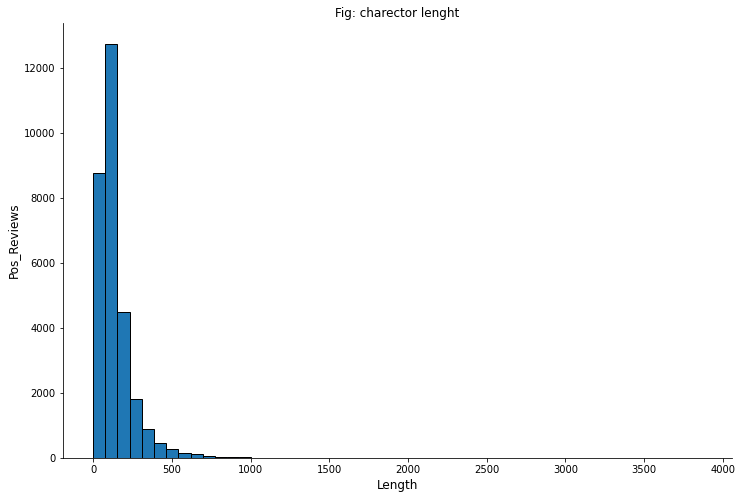

In [63]:
plt.figure(figsize=(12,8))
plt.hist(sent_len,edgecolor='black',bins=50)
plt.title("Fig: charector lenght",fontsize=12)
plt.ylabel("Pos_Reviews",fontsize=12)
plt.xlabel("Length",fontsize=12)
sns.despine()
plt.show()


#### Top 40 words by frequency among all the words.

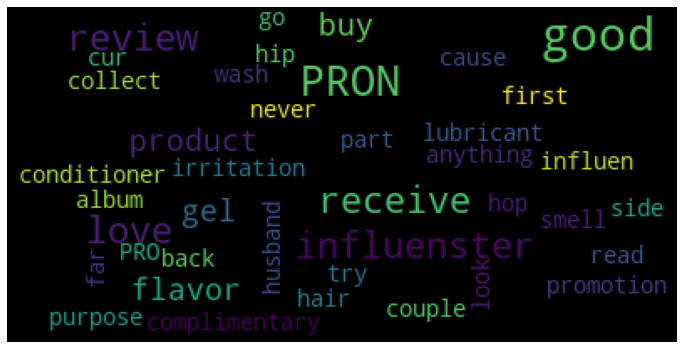

In [64]:
wordcloud = WordCloud(
                          background_color='Black',
                          max_words=40,
                          max_font_size=28, 
                          random_state=42
                         ).generate(str(clean_rr_df["pos_text"]))

fig = plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We need to remove PRON from the text corpus as it doesn't have any significance

In [65]:
clean_rr_df["final_reviews"]=clean_rr_df.pos_text.str.replace('-PRON-', '')

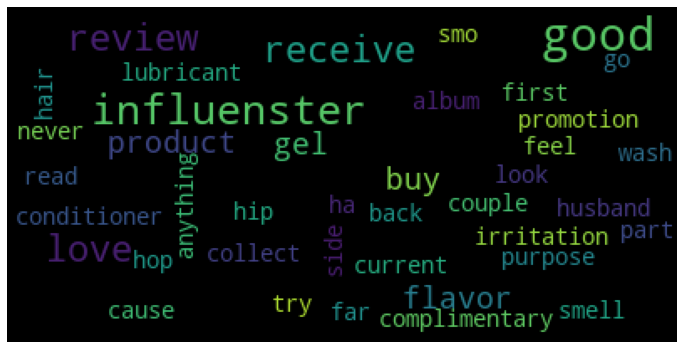

In [66]:
wordcloud = WordCloud(
                          background_color='Black',
                          max_words=40,
                          max_font_size=28, 
                          random_state=42
                         ).generate(str(clean_rr_df["final_reviews"]))

fig = plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Examining unigram, bigram, trigrams by frequency

#### unigram

In [67]:
#Function for top 30 unigram by frequency  

def get_top_n_words(text, n=None):
    
    vec = CountVectorizer(stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

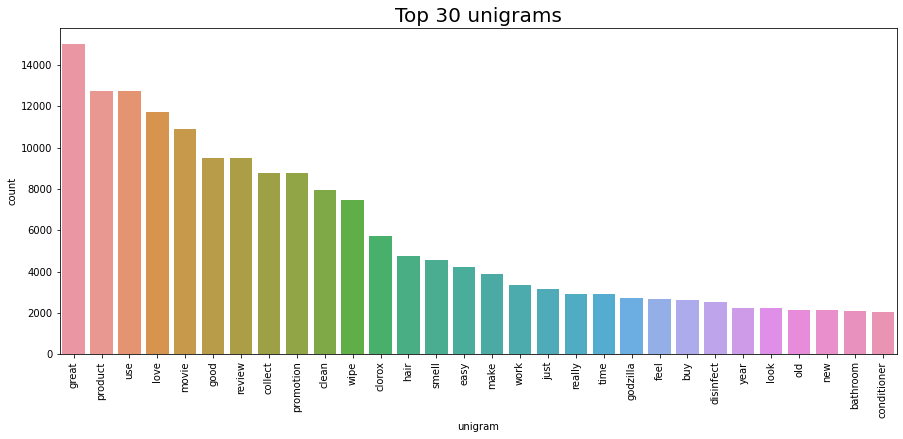

In [68]:
top_n_words = get_top_n_words(clean_rr_df.final_reviews.values.astype('U'), 30)
df1 = pd.DataFrame(top_n_words, columns = ['unigram' , 'count'])

# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='unigram', y='count', data=df1)
plt.xticks(rotation=90)
plt.title("Top 30 unigrams", fontsize=20)
plt.show()

#### bigram

In [69]:
#Function for top 30 bigram by frequency  
def get_top_n_bigram(text, n=None):
   
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

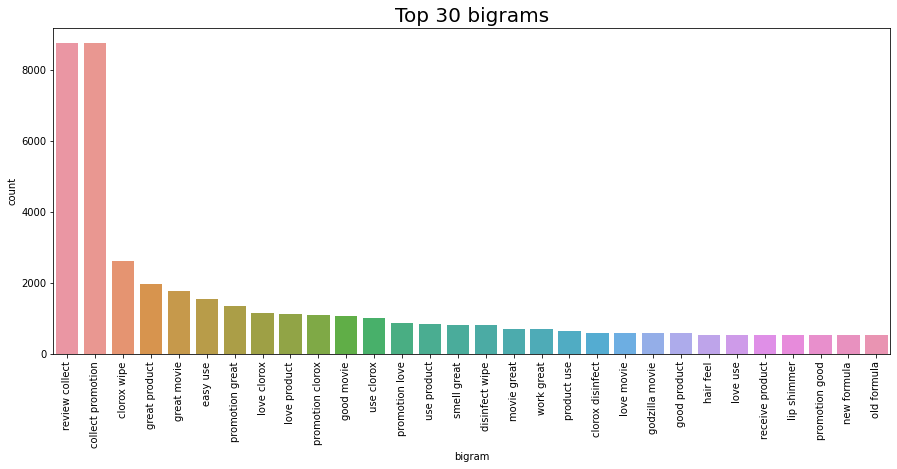

In [70]:

top_2_gram = get_top_n_bigram(clean_rr_df.final_reviews.values.astype('U'), 30)
df2 = pd.DataFrame(top_2_gram, columns = ['bigram' , 'count'])

# Plot the top 30 bigrams
plt.figure(figsize=(15,6))
sns.barplot(x='bigram', y='count', data=df2)
plt.xticks(rotation=90)
plt.title("Top 30 bigrams", fontsize=20)
plt.show()

#### Trigram

In [71]:
#Function for top 30 trigram by frequency  
def get_top_n_trigram(text, n=None):
    
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

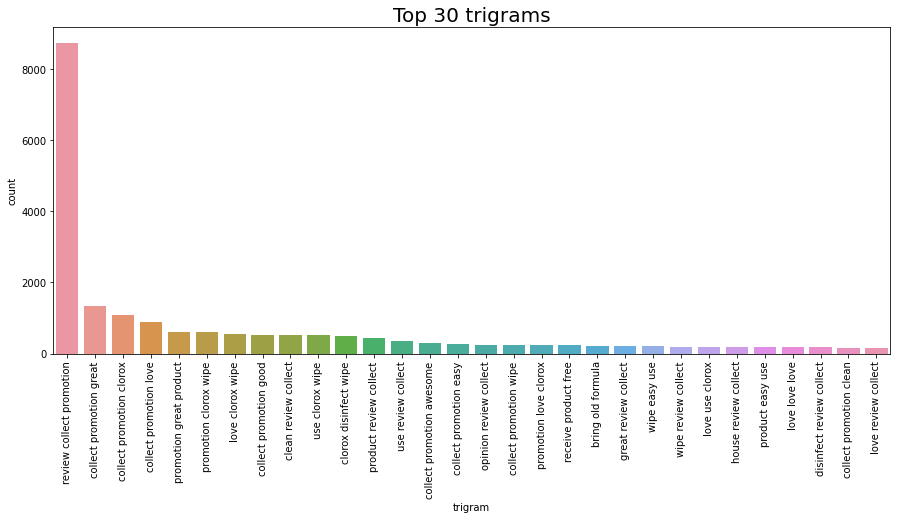

In [72]:
top_tri_gram = get_top_n_trigram(clean_rr_df.final_reviews.values.astype('U'), 30)
df3 = pd.DataFrame(top_tri_gram, columns = ['trigram' , 'count'])

# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='trigram', y='count', data=df3)
plt.xticks(rotation=90)
plt.title("Top 30 trigrams", fontsize=20)
plt.show()

## 1.2 Feature extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the reviews"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 reviews

**ngram_range** (1, 3) to indicate that unigramm, bigrams and trigram will be considered.

**stop_words** will remove the predefined stop words in 'english'.

**max_features** will Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [73]:
#Initialisation of the TfidfVectorizer 
tfidf=TfidfVectorizer(max_features=15000,ngram_range=(1,3),max_df =.95, min_df=2, stop_words="english")

In [74]:
tfidf

TfidfVectorizer(max_df=0.95, max_features=15000, min_df=2, ngram_range=(1, 3),
                stop_words='english')

In [75]:
# Document Term Matrix by transforming the final_reviews column present in clean_rr_df.
#dtm-->document term matrix
dtm = tfidf.fit_transform(clean_rr_df.final_reviews)
dtm_df=pd.DataFrame(dtm.toarray(), columns=tfidf.get_feature_names())
dtm_df

,aaron,ability,able,able clean,able day,able day wash,able disinfect,able grab,able just,able make,...,yum,yum yum,yummy,zac,zac efron,zero,zilla,zombie,zombie movie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# Split the data into train and test and check the shape
feature_train,feature_test,target_train,target_test=train_test_split(dtm_df,clean_rr_df['user_sentiment'],test_size=0.3)
print(feature_train.shape," ",target_train.shape)
print(feature_test.shape," ",target_test.shape)

(20955, 15000)   (20955,)
(8981, 15000)   (8981,)


In [77]:
# As data is imbalance, so to resolve this we using SMOTE technique for oversampling

print("Before oversampling total positive samples in feature_train set {}".format(sum(target_train=='Positive')))
print("Before oversampling total negative samples in feature_train set {}".format(sum(target_train=='Negative')))

smote=SMOTE(random_state=0)
feature_train_new,target_train_new=smote.fit_resample(feature_train,target_train.ravel())
print("\n\n")

print("After oversampling total positive samples in feature_train_new set {}".format(sum(target_train_new=='Positive')))
print("After oversampling total negative samples in feature_train_new set {}".format(sum(target_train_new=='Negative')))



Before oversampling total positive samples in feature_train set 18624
Before oversampling total negative samples in feature_train set 2331



After oversampling total positive samples in feature_train_new set 18624
After oversampling total negative samples in feature_train_new set 18624


## 1.3 Training a text classification model

### Logistic Regression

In [78]:
lr=LogisticRegression()
lr.fit(feature_train_new,target_train_new.ravel())
lr_prediction=lr.predict(feature_test)

print(classification_report(target_test,lr_prediction))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

    Negative       0.48      0.72      0.58      1026
    Positive       0.96      0.90      0.93      7955

    accuracy                           0.88      8981
   macro avg       0.72      0.81      0.75      8981
weighted avg       0.91      0.88      0.89      8981



### Random Forest

In [79]:
#RandomForest with hyperparameters

params=[
        {'criterion': ['gini','entropy'],
        'n_estimators':[100,500],
        'max_depth':[10,20]
        }
]
grid_search=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                         param_grid=params,cv=3)
grid_search.fit(feature_train_new,target_train_new.ravel())


print("Best param",grid_search.best_params_)
print("Best score",grid_search.best_score_)

Best param {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 500}
Best score 0.8618717783505154


In [80]:
maxdepth=grid_search.best_estimator_.max_depth
n_est=grid_search.best_estimator_.n_estimators
njob=grid_search.best_estimator_.n_jobs
crite=grid_search.best_estimator_.criterion

In [81]:
print(maxdepth)
print(n_est)
print(njob)
print(crite)

20
500
-1
gini


In [82]:
# With hypertuned best parameters
rf = RandomForestClassifier(criterion=crite, max_depth=maxdepth, n_estimators=n_est, n_jobs=njob)
rf.fit(feature_train_new,target_train_new.ravel())
rf_prediction = rf.predict(feature_test)

print(classification_report(target_test, rf_prediction))

              precision    recall  f1-score   support

    Negative       0.34      0.67      0.45      1026
    Positive       0.95      0.83      0.89      7955

    accuracy                           0.81      8981
   macro avg       0.64      0.75      0.67      8981
weighted avg       0.88      0.81      0.84      8981



### XGBoost

In [83]:
# XGBoost 
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(feature_train_new,target_train_new.ravel())
xgb_predictions = xgb.predict(feature_test)

print(classification_report(target_test, xgb_predictions))

              precision    recall  f1-score   support

    Negative       0.33      0.69      0.45      1026
    Positive       0.95      0.82      0.88      7955

    accuracy                           0.81      8981
   macro avg       0.64      0.76      0.67      8981
weighted avg       0.88      0.81      0.83      8981



### Navie Bayes

In [84]:
#Naive Bayes

nb = MultinomialNB()

nb.fit(feature_train_new, target_train_new.ravel())
nb_predictions = nb.predict(feature_test)
 
print(classification_report(target_test, nb_predictions))

              precision    recall  f1-score   support

    Negative       0.35      0.67      0.46      1026
    Positive       0.95      0.84      0.89      7955

    accuracy                           0.82      8981
   macro avg       0.65      0.76      0.68      8981
weighted avg       0.88      0.82      0.84      8981



# 2.	Building a recommendation system:
- 2.1 User-based recommendation system.
- 2.2 Item-based recommendation system.


## 2.1 User-based recommendation system.

In [85]:
user_df=clean_rr_df[["id","reviews_rating","reviews_username"]]
user_df.head()

,id,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,5,joshua
1,AV14LG0R-jtxr-f38QfS,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,5,dorothy w
3,AV16khLE-jtxr-f38VFn,1,rebecca
4,AV16khLE-jtxr-f38VFn,1,walker557


In [86]:
user_df.isna().sum()

id                  0
reviews_rating      0
reviews_username    0
dtype: int64

Since we already cleaned the data in pre-processing we are not finding any null values.

In [87]:
#Dividing the dataset into train and test set
user_train,user_test=train_test_split(user_df,test_size=.2,random_state=42)

In [88]:
# Shape of the dataset
print(user_train.shape)
print(user_test.shape)

(23948, 3)
(5988, 3)


In [89]:
# Now we have to create a table where columns are products and rows are users with rating values
user_pivot_df=user_train.pivot_table(index='reviews_username',columns='id',values='reviews_rating',aggfunc=np.mean).fillna(0)
user_pivot_df.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#####  Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the 'id; which has not been rated by the user. To ignore the 'id' rated by the user, we will mark it as 0 during prediction. The 'id' not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the 'id' rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [90]:
# Copy the train dataset into dummy_train
user_dummy_train = user_train.copy()

In [91]:
# The id not rated by user is marked as 1 for prediction. 
user_dummy_train['reviews_rating'] = user_dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [92]:
# Convert the dummy train dataset into matrix format.
user_dummy_train = user_dummy_train.pivot_table(index='reviews_username',columns='id',values='reviews_rating',aggfunc=np.mean).fillna(1)
user_dummy_train

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxcsdfd,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zxjki,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zyiah4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different 'id's.


#### User Similarity Matrix

##### Using Cosine Similarity

In [93]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(user_pivot_df, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)


[[1.        0.        0.        ... 0.        0.9486833 0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.9486833 0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [94]:
user_correlation.shape

(20545, 20545)

#### Using adjusted Cosine 

##### Here, we are not removing the NaN values and calculating the mean only for the 'id's rated by the user

In [95]:
# Create a user-id matrix.
user_pivot_df=user_train.pivot_table(index='reviews_username',columns='id',values='reviews_rating')

In [96]:
user_pivot_df.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Normalising the rating of the movie for each user around 0 mean

In [97]:
mean = np.nanmean(user_pivot_df, axis=1)
user_df_subtracted = (user_pivot_df.T-mean).T

In [98]:
user_df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(user_df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [100]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user (for "id"s rated as well as not rated) is the weighted sum of correlation with the "id" rating (as present in the rating dataset). 

In [101]:
user_predicted_ratings = np.dot(user_correlation, user_pivot_df.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 2.5       , ..., 0.        , 0.        ,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [102]:
user_predicted_ratings.shape

(20545, 264)

Since we are interested only in the "id"s not rated by the user, we will ignore the "id"s rated by the user by making it zero. 

In [103]:
user_final_rating = np.multiply(user_predicted_ratings,user_dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.697789,0.0,0.0,0.0,0.64226,2.620712,0.944911,...,0.0,0.0,0.0,0.0,0.0,0.0,1.462719,0.0,0.0,0.204124
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


#### Finding the top 20 recommendation for the *user*

In [104]:
clean_rr_df.reviews_username

0               joshua
1            dorothy w
2            dorothy w
3              rebecca
4            walker557
             ...      
29995       laurasnchz
29996    scarlepadilla
29997       liviasuexo
29998         ktreed95
29999        kcoopxoxo
Name: reviews_username, Length: 29936, dtype: object

Recommandation for user "joshua"

In [105]:
# Take the user ID as input.
user_input = "joshua"

In [106]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

id
AVpf3VOfilAPnD_xjpun    7.837536
AVpfPaoqLJeJML435Xk9    4.774875
AVpe41TqilAPnD_xQH3d    3.452312
AVpe59io1cnluZ0-ZgDU    3.104013
AVpfDA6wilAPnD_xTxdg    3.077287
AVpfAgSp1cnluZ0-b2-K    3.077287
AVpf0eb2LJeJML43EVSt    2.796084
AVpf385g1cnluZ0-s0_t    2.220864
AVpfM_ytilAPnD_xXIJb    1.899619
AVpfRTh1ilAPnD_xYic2    1.209680
AVpfPnrU1cnluZ0-g9rL    1.126702
AVpfOIrkilAPnD_xXgDG    0.799503
AVpfov9TLJeJML43A7B0    0.771989
AVpfNWbPilAPnD_xXPR7    0.652791
AV1YGDqsGV-KLJ3adc-O    0.652791
AVpe8gsILJeJML43y6Ed    0.623142
AVpfm8yiLJeJML43AYyu    0.604367
AVpfJP1C1cnluZ0-e3Xy    0.540562
AVpf5olc1cnluZ0-tPrO    0.540562
AVpfazX31cnluZ0-kbdl    0.520929
Name: joshua, dtype: float64

#### Evaluation - User User

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the "id"s already rated by the user insead of predicting it for the "id"s not rated by the user. 

In [107]:
# Find out the common users of test and train dataset.
common = user_test[user_test.reviews_username.isin(user_train.reviews_username)]
common.shape

(1486, 3)

In [108]:
common.head()

,id,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,5,jessica
22577,AVpfOmKwLJeJML435GM7,4,at527
21657,AVpfm8yiLJeJML43AYyu,1,romance318
23320,AVpfPaoqLJeJML435Xk9,3,countprice
21505,AVpfm8yiLJeJML43AYyu,1,farbar


In [109]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [110]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [111]:
user_df_subtracted.head(1)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
user_correlation_df['reviews_username'] = user_df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20535,20536,20537,20538,20539,20540,20541,20542,20543,20544
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
common.head(1)

,id,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,5,jessica


In [114]:
list_name = common.reviews_username.tolist()
user_correlation_df.columns = user_df_subtracted.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [115]:
user_correlation_df_1.shape

(1303, 20545)

In [116]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [117]:
user_correlation_df_3 = user_correlation_df_2.T

In [118]:
user_correlation_df_3.head()

,1234,1234567,123charlie,1witch,85lisa,aac06002,aalyah,aaron,abcgator,abret,...,woowoo,wowiezowie,wren113,xavier,yayawomack,yorkielvr,yummy,yvonne,zebras,zxcsdfd
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.288675,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
85lisa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
user_correlation_df_3.shape

(1303, 1303)

In [120]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 1.44337567, 0.        , ..., 0.        , 0.        ,
        1.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [121]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [122]:
dummy_test.shape

(1303, 114)

In [123]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [124]:
common_user_predicted_ratings.head(2)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1Ymf_rglJLPUi8II2v,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,...,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the "id"s rated by user. For RMSE, normalising the rating to (1,5) range.

In [125]:
X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [126]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [127]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [128]:
user_rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(user_rmse)

2.576775125683957


## 2.2 Item-based recommendation system.


Taking the transpose of the rating matrix to normalize the rating around the mean for different id . In the user based similarity, we had taken mean for each user instead of each user. 

In [129]:
item_pivot_df = user_train.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

item_pivot_df.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the ratings for each item for using the Adujsted Cosine

In [130]:
mean = np.nanmean(item_pivot_df, axis=1)
item_df_subtracted = (item_pivot_df.T-mean).T

In [131]:
item_df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [132]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(item_df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [133]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### Prediction - Item Item

In [134]:
item_predicted_ratings = np.dot((item_pivot_df.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0091844 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00734752]])

In [135]:
item_predicted_ratings.shape

(20545, 264)

In [136]:
user_dummy_train.shape

(20545, 264)

##### Filtering the rating only for the items not rated by the user for recommendation

In [137]:
item_final_rating = np.multiply(item_predicted_ratings,user_dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.008568,0.0,0.0,0.0,0.000000,0.000000,0.005666,...,0.000000,0.011946,0.0,0.0,0.0,0.018793,0.005349,0.0,0.0,0.000000
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.004493,...,0.072379,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.007489,...,0.120632,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.005991,...,0.096505,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.001247,0.003517,0.001743,...,0.000000,0.003674,0.0,0.0,0.0,0.005780,0.000000,0.0,0.0,0.009184


##### Finding the top 20 recommendation for the *user*

recommandations for user "joshua"

In [138]:
# printing user name

print(user_input)

joshua


In [139]:
# Recommending the Top 20 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

id
AVpfr5cb1cnluZ0-pZFp    0.093684
AVpe_dxlilAPnD_xSiHI    0.092225
AVpf0pfrilAPnD_xi6s_    0.047762
AVpfm8yiLJeJML43AYyu    0.043194
AVpe59io1cnluZ0-ZgDU    0.043181
AVpe41TqilAPnD_xQH3d    0.034510
AVpfUJu_ilAPnD_xZdDr    0.028763
AVpfMpZ51cnluZ0-f_L9    0.026885
AVpe_pDG1cnluZ0-bjSf    0.020118
AV1YmDL9vKc47QAVgr7_    0.018702
AVpfOmKwLJeJML435GM7    0.018115
AVpfRTh1ilAPnD_xYic2    0.017879
AVpfNWbPilAPnD_xXPR7    0.017226
AVpe7sl91cnluZ0-aI1Y    0.014807
AVpfM_ytilAPnD_xXIJb    0.014029
AVpfov9TLJeJML43A7B0    0.012218
AVpf5CnILJeJML43FjaU    0.011710
AVpf0thK1cnluZ0-r8vR    0.011395
AVpfazX31cnluZ0-kbdl    0.010730
AVpf3VOfilAPnD_xjpun    0.010515
Name: joshua, dtype: float64

##### Evaluation - Item Item

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the item already rated by the user insead of predicting it for the item not rated by the user. 

In [140]:
common =  user_test[user_test.id.isin(user_train.id)]
common.shape

(5980, 3)

In [141]:
common.head()

,id,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,3,angie1108
1138,AV1YmDL9vKc47QAVgr7_,5,falisha
12875,AVpf3VOfilAPnD_xjpun,5,jessica


In [142]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [143]:
common_item_based_matrix.shape

(180, 5665)

In [144]:
item_correlation_df = pd.DataFrame(item_correlation)

In [145]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
item_correlation_df['id'] = item_df_subtracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
list_name = common.id.tolist()

In [148]:
item_correlation_df.columns = item_df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [149]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [150]:
item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,...,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.002316,0.0,0.0,...,0.000000,0.097694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.101523,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01862395, 3.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00734752, ..., 0.        , 0.        ,
        0.0091844 ]])

In [152]:
common_item_predicted_ratings.shape

(180, 5665)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the items rated by the user. So, this is marked as 1. This is just opposite of user_dummy_train


In [153]:
item_dummy_test = common.copy()

item_dummy_test['reviews_rating'] = item_dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

item_dummy_test = item_dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,item_dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [154]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [155]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [156]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [157]:
item_rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(item_rmse)

3.5734994071451864


#### Selecting Models:

In [158]:
print("User-User collaboration RMSE:",user_rmse)
print("Item-Item collaboration RMSE:",item_rmse)

User-User collaboration RMSE: 2.576775125683957
Item-Item collaboration RMSE: 3.5734994071451864


We are choosing User-User collaboration as it has less Rmse compared to item-item collaboration

In [159]:
model_predictions={"Naive Bayes":nb_predictions,"Random Forest":rf_prediction,"Logistic Regression":lr_prediction,"XGBoost":xgb_predictions}

In [160]:
model_dict=dict()
for i in model_predictions.keys():
  score=f1_score(target_test, model_predictions[i],pos_label='Positive')
  model_dict[score]=i
print("F1 scores:\n")
model_dict

F1 scores:



{0.8836864120901362: 'XGBoost',
 0.8868013151714419: 'Random Forest',
 0.8918449197860963: 'Naive Bayes',
 0.9295042557338704: 'Logistic Regression'}

Based on F1 scores we are choosing Logistic Regression as it has high F1 score

#### Pickling Files

In [161]:
# pickling tfidf model 
pkl_file_tfidf=open('/content/gdrive/MyDrive/CapstoneProject_e-commerce/PickleFiles/tfidf_pickle.pkl',"wb")
pickle.dump(tfidf,pkl_file_tfidf)
pkl_file_tfidf.close()

In [162]:
#pickling selected sentimental model
pkl_file_recommender=open('/content/gdrive/MyDrive/CapstoneProject_e-commerce/PickleFiles/sentimental.pkl','wb')
pickle.dump(lr,pkl_file_recommender)
pkl_file_recommender.close()

In [163]:
# pickling cleaned data
pkl_clean_rr_df=open('/content/gdrive/MyDrive/CapstoneProject_e-commerce/PickleFiles/clean_df.pkl','wb')
pickle.dump(clean_rr_df,pkl_clean_rr_df)
pkl_clean_rr_df.close()

In [164]:
# pickling recommender model
pkl_user_final_rating=open('/content/gdrive/MyDrive/CapstoneProject_e-commerce/PickleFiles/Recommender.pkl','wb')
pickle.dump(user_final_rating,pkl_user_final_rating)
pkl_user_final_rating.close()

# 3.	Improving the recommendations using the sentiment analysis model:

#### Initiating required models
Depickling can be done using below commanted commands --pickle.load()---Here we are not using depickling.


In [165]:
tfidf_model=tfidf #pickle.load(open('/content/gdrive/MyDrive/CapstoneProject_e-commerce/PickleFiles/tfidf_pickle.pkl','rb'))

In [166]:
sentimental_model=lr #pickle.load(open('/content/gdrive/MyDrive/CapstoneProject_e-commerce/PickleFiles/sentimental.pkl','rb'))

In [167]:
clean_df_model=clean_rr_df #pickle.load(open('/content/gdrive/MyDrive/CapstoneProject_e-commerce/PickleFiles/clean_df.pkl','rb'))

In [168]:
user_final_rating_model=user_final_rating #pickle.load(open('/content/gdrive/MyDrive/CapstoneProject_e-commerce/PickleFiles/Recommender.pkl','rb'))

We will check this for the user "joshua"

In [169]:
user_final_rating_model.loc[user_input].sort_values(ascending=False)[:20]

id
AVpf3VOfilAPnD_xjpun    7.837536
AVpfPaoqLJeJML435Xk9    4.774875
AVpe41TqilAPnD_xQH3d    3.452312
AVpe59io1cnluZ0-ZgDU    3.104013
AVpfDA6wilAPnD_xTxdg    3.077287
AVpfAgSp1cnluZ0-b2-K    3.077287
AVpf0eb2LJeJML43EVSt    2.796084
AVpf385g1cnluZ0-s0_t    2.220864
AVpfM_ytilAPnD_xXIJb    1.899619
AVpfRTh1ilAPnD_xYic2    1.209680
AVpfPnrU1cnluZ0-g9rL    1.126702
AVpfOIrkilAPnD_xXgDG    0.799503
AVpfov9TLJeJML43A7B0    0.771989
AVpfNWbPilAPnD_xXPR7    0.652791
AV1YGDqsGV-KLJ3adc-O    0.652791
AVpe8gsILJeJML43y6Ed    0.623142
AVpfm8yiLJeJML43AYyu    0.604367
AVpfJP1C1cnluZ0-e3Xy    0.540562
AVpf5olc1cnluZ0-tPrO    0.540562
AVpfazX31cnluZ0-kbdl    0.520929
Name: joshua, dtype: float64

In [170]:
recommended_prods_20=user_final_rating_model.loc[user_input].sort_values(ascending=False)[:20]
recommended_prods_20

id
AVpf3VOfilAPnD_xjpun    7.837536
AVpfPaoqLJeJML435Xk9    4.774875
AVpe41TqilAPnD_xQH3d    3.452312
AVpe59io1cnluZ0-ZgDU    3.104013
AVpfDA6wilAPnD_xTxdg    3.077287
AVpfAgSp1cnluZ0-b2-K    3.077287
AVpf0eb2LJeJML43EVSt    2.796084
AVpf385g1cnluZ0-s0_t    2.220864
AVpfM_ytilAPnD_xXIJb    1.899619
AVpfRTh1ilAPnD_xYic2    1.209680
AVpfPnrU1cnluZ0-g9rL    1.126702
AVpfOIrkilAPnD_xXgDG    0.799503
AVpfov9TLJeJML43A7B0    0.771989
AVpfNWbPilAPnD_xXPR7    0.652791
AV1YGDqsGV-KLJ3adc-O    0.652791
AVpe8gsILJeJML43y6Ed    0.623142
AVpfm8yiLJeJML43AYyu    0.604367
AVpfJP1C1cnluZ0-e3Xy    0.540562
AVpf5olc1cnluZ0-tPrO    0.540562
AVpfazX31cnluZ0-kbdl    0.520929
Name: joshua, dtype: float64

In [171]:
products_20_reviews=clean_df_model[clean_df_model.id.isin([x for x in recommended_prods_20.index])][["id","name","final_reviews"]]
products_20_reviews

,id,name,final_reviews
688,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,leave window streak do seem work ok other sur...
689,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,leave streak bad i use windsheild washer fluid...
690,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,very disappointed product leave kind streak ma...
691,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,windex use be good year ago reformulate i no...
692,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,have use windex year i notice last year so ver...
...,...,...,...
28360,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,threeyo love movie love combo pack awesome movie
28361,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,i buy young be hit thoroughly character aweso...
28362,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,son i love movie first plane movie nan
28363,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,i not find anywhere order threeyr old grandson...


In [172]:
predict_dtm = tfidf_model.transform(products_20_reviews.final_reviews)
predict_dtm_df=pd.DataFrame(predict_dtm.toarray(), columns=tfidf_model.get_feature_names())
predict_dtm_df

,aaron,ability,able,able clean,able day,able day wash,able disinfect,able grab,able just,able make,...,yum,yum yum,yummy,zac,zac efron,zero,zilla,zombie,zombie movie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
products_20_reviews["predicted_sentiment"]=sentimental_model.predict(predict_dtm_df)

In [174]:
products_20_reviews

,id,name,final_reviews,predicted_sentiment
688,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,leave window streak do seem work ok other sur...,Positive
689,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,leave streak bad i use windsheild washer fluid...,Negative
690,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,very disappointed product leave kind streak ma...,Negative
691,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,windex use be good year ago reformulate i no...,Negative
692,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,have use windex year i notice last year so ver...,Negative
...,...,...,...,...
28360,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,threeyo love movie love combo pack awesome movie,Positive
28361,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,i buy young be hit thoroughly character aweso...,Positive
28362,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,son i love movie first plane movie nan,Positive
28363,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,i not find anywhere order threeyr old grandson...,Negative


In [175]:
products_20_reviews["predicted_sentiment_scorevalue"]=products_20_reviews.predicted_sentiment.apply(lambda x: 1 if x=='Positive' else 0)

In [176]:
products_20_reviews

,id,name,final_reviews,predicted_sentiment,predicted_sentiment_scorevalue
688,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,leave window streak do seem work ok other sur...,Positive,1
689,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,leave streak bad i use windsheild washer fluid...,Negative,0
690,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,very disappointed product leave kind streak ma...,Negative,0
691,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,windex use be good year ago reformulate i no...,Negative,0
692,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,have use windex year i notice last year so ver...,Negative,0
...,...,...,...,...,...
28360,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,threeyo love movie love combo pack awesome movie,Positive,1
28361,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,i buy young be hit thoroughly character aweso...,Positive,1
28362,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,son i love movie first plane movie nan,Positive,1
28363,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,i not find anywhere order threeyr old grandson...,Negative,0


In [177]:
products_20_pivot=products_20_reviews.pivot_table(values="predicted_sentiment_scorevalue",index='name',aggfunc='mean')
products_20_pivot.sort_values(by="predicted_sentiment_scorevalue",inplace=True,ascending=False)
products_20_pivot.head(5)

,predicted_sentiment_scorevalue
name,
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),0.919162
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),0.913978
Clorox Disinfecting Bathroom Cleaner,0.899951
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),0.898424
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,0.868739


The above are the final top 5 products recommended to user "joshua"